# Обязательная часть
Необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Работа будет произведена с отчетом по сообщениям о НЛО в прошлом веке (https://www.kaggle.com/NUFORC/ufo-sightings?select=scrubbed.csv). Я взял файл scrubbed.csv, т.к. в него не включены записи, в которых место наблюдения НЛО не определено. Единственное, что я исправил в исходном файле - удалил лишний пробел в конце первой строки с заголовками  столбцов (иначе
последний столбец был 'longitude '. Я этот пробел не сразу заметил и долго не мог понять почему pandas ругается на имя столбца)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

In [3]:
ufo = pd.read_csv('scrubbed.csv')
ufo.tail()

D:\Data_science\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778


In [4]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [5]:
# почему в 'duration (seconds)' object? И вообще много столбцов с числовыми данными имеют формат object
ufo['duration (seconds)'].unique()

array(['2700', '7200', '20', '900', '300', '180', '1200', '120', '1800',
       '30', '360', '60', '3', '270', '600', '2', '3600', '10', '8', '5',
       '14400', '15', '45', '90', '10800', '240', '43', '18000', '37800',
       '3000', '35', '4', '6', '40', '630', '1', '720', '5400', '1500',
       '172800', '1351', '540', '13', '420', '2400', '480', '97836000',
       '7', '25', '6312000', '330', '9000', '1020', '28800', '12', '75',
       '150', '14', '9', '29', '1260', '11', '7620', '2100', '1080', '22',
       '1620', '65', '3300', '50', '17', '259200', '660', '2640', '55',
       '1350', '4200', '16', '1.5', '0.1', '21600', '36000', '315', '165',
       '0.05', '432000', '1320', '1380', '0.5', '1.2', '6300', '1860',
       '120.1', '1396', '718', '2.5', '1560', '80', '4500', '147', '780',
       '960', '73800', '2631600', '23', '31', '78', '109800', '24',
       '1733', '0.001', '604800', '61', '114', '18', '27', '1295', '19',
       '130', '1000', '43200', '2220', '4800', '34', '

In [6]:
# В этом столбце значения должны быть в секундах, некоторые значения имеют вид 2` . Может быть значение указано в минутах? 
# Найдем все подобные значения:

In [7]:
ufo.loc[ufo['duration (seconds)'].astype(str).str.contains('`')]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
27822,2/2/2000 19:33,bouse,az,us,NaN,2`,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2/16/2000,33.9325000,-114.005000
35692,4/10/2005 22:52,santa cruz,ca,us,NaN,8`,eight seconds,2 red lights moving together and apart with a ...,4/16/2005,36.9741667,-122.029722
58591,7/21/2006 13:00,ibague (colombia),NaN,NaN,circle,0.5`,1/2 segundo,Viajaba a 27.000 pies en un avion comercial ve...,10/30/2006,4.440663,-75.244141


In [8]:
# Сосоедний текстовый стобец указывает, что это все-таки секунды. Значит можно смело удалить символ '`'
ufo['duration (seconds)'].replace('\`','',inplace=True,regex=True)

In [9]:
# Еще раз проверяем
ufo.loc[ufo['duration (seconds)'].astype(str).str.contains('`')]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude


In [10]:
# Переводим столбец в числовой формат
ufo['duration (seconds)']=ufo['duration (seconds)'].astype('float64')

In [11]:
# Теперь преобразуем столбцы с датами

In [12]:
ufo['datetime'] = pd.to_datetime(ufo['datetime'], format='%m/%d/%Y %H:%M')

ValueError: time data '10/11/2006 24:00' does not match format '%m/%d/%Y %H:%M' (match)

In [13]:
# Ошибка из-за неправильного формата. Сколько записей с таким форматом времени? 
ufo.loc[ufo['datetime'].astype(str).str.contains('24:00')]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
388,10/11/2006 24:00,rome,ny,us,oval,120.0,a min or two,I was walking from the garage to the house&#44...,2/1/2007,43.2127778,-75.456111
693,10/1/2001 24:00,chulucanas-piura la vieja (peru),NaN,NaN,other,6312000.0,2 years,go to: http://www.24horas.com.pe/data/videos/...,3/4/2003,-5.129547,-80.120569
962,10/1/2012 24:00,novi,mi,us,triangle,300.0,5 minutes,V shaped and 8 big and very brite lights&#44mo...,10/30/2012,42.4805556,-83.475556
1067,10/12/2003 24:00,salatiga (indonesia),NaN,NaN,disk,22.0,22 seconds,UFO in Salatiga&#44Indonesia,10/31/2003,-7.33683,110.498817
1221,10/12/2013 24:00,cincinnati,oh,us,fireball,300.0,3-5 minutes,A bright orange light split into four&#44 did ...,10/14/2013,39.1619444,-84.456944
...,...,...,...,...,...,...,...,...,...,...,...
79136,9/4/2005 24:00,boonville,nc,us,cigar,10800.0,3+ hours,Unusual activity in our small community&#44 cr...,9/9/2013,36.2325,-80.708333
79137,9/4/2005 24:00,redondo beach,ca,us,triangle,300.0,5 minutes,Triangulat UFO seen over Redondo Beach&#44 Cal...,12/16/2005,33.849167,-118.387500
79740,9/7/2002 24:00,portsmouth,oh,us,changing,900.0,15 minutes,A bright red light hoovering in the sky.,9/13/2002,38.731667,-82.997778
79759,9/7/2004 24:00,montrose,co,us,unknown,1200.0,20 minutes,Stationary object with three pulsating lights ...,9/9/2004,38.478333,-107.875556


In [14]:
# Для устранения ошибки заменим 24:00 на 00:00
ufo['datetime'].replace('24:00','00:00',inplace=True,regex=True)

In [15]:
# Еще раз пробуем преобразовать в даты
ufo['datetime'] = pd.to_datetime(ufo['datetime'], format='%m/%d/%Y %H:%M')

In [16]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  float64       
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  object        
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 6.7+ MB


In [17]:
ufo['date posted'] = pd.to_datetime(ufo['date posted'], format='%m/%d/%Y')

In [18]:
# Разберемся с типом данных в столбце latitude (широта)
ufo['latitude']=ufo['latitude'].astype('float64')

ValueError: could not convert string to float: '33q.200088'

In [19]:
# Неизвестно сколько подобных строк и с какими символами. Попробуем найти сначала с q
ufo.loc[ufo['latitude'].astype(str).str.contains('q')]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
43782,1974-05-22 05:30:00,mescalero indian reservation,nm,NaN,rectangle,180.0,two hours,Huge rectangular object emmitting intense whit...,2012-04-18,33q.200088,-105.624152


In [20]:
# Удалим символ и еще раз попробуем преобразовать в числовой тип
ufo['latitude'].replace('q','',inplace=True,regex=True)

In [21]:
ufo['latitude']=ufo['latitude'].astype('float64')

In [156]:
# Итак получился почти "причесанный" датафрейм с датами наблюдения НЛО, временем наблюдения в секундах, датами публикации,
# географическими координатами места наблюдения. Столбцы 'duration (hours/min)' (- это текстовое описание содержимого 
# столбца 'duration (seconds)' написанное в свободной форме) и 'comments' (комментарии) - не содержат для нас 
# какой-либо ценной информации (по идее их вообще можно удалить). А вот столбец 'country' имеет много пропусков, из-за этого 
# при группировке по странам может быть потеряно много данных. Заменим эти пропуски на значение "other"
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  float64       
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  datetime64[ns]
 9   latitude              80332 non-null  float64       
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 6.7+ MB


In [22]:
ufo.loc[pd.isna(ufo['country']), :]
ufo['country'].fillna('other', inplace=True)

In [23]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               80332 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  float64       
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  datetime64[ns]
 9   latitude              80332 non-null  float64       
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 6.7+ MB


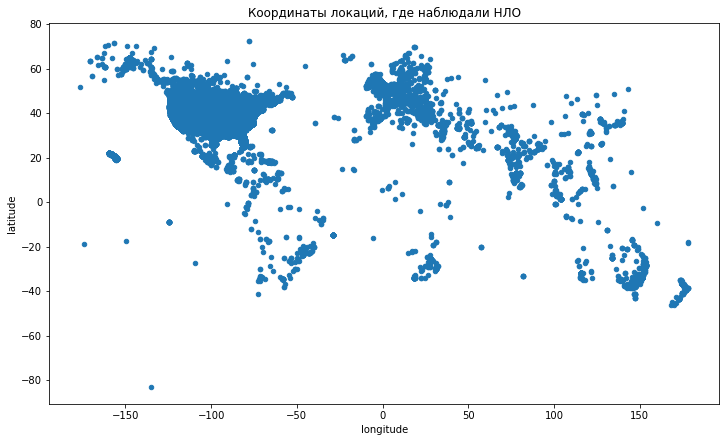

In [24]:
# изобразим точками координаты всех локаций, где наблюдали НЛО
ufo.plot(kind='scatter', 
        x='longitude', 
        y='latitude', 
        title='Координаты локаций, где наблюдали НЛО')
plt.show()

In [25]:
# Даже по этим точкам вырисовываются территории США и Европы - места, где больше всего было получено данных о НЛО.
# Либо инопланетяне действиетльно больше любят США и Европу, либо просто на этих территориях больше развиты комуникации при
# большой концентрации людей. В общем, чем более "развита" территория, тем больше с этой территории данных о НЛО.
# В Африке, Южной Америке и России отмечены единичные случаи (относительно тех двух территорий).
# Возможно на территории нашей страны тоже видят НЛО, но просто редко сообщают об этом.
# Еще на этой "карте" есть одна точка, которая отдалена от всех остальных. Найдем ее координаты.
ufo['latitude'].min()

-82.862752

In [26]:
ufo.loc[ufo['latitude']==-82.862752]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
42403,1994-05-15 13:00:00,antarctica (ross ice shelf) (antarctica),NaN,other,fireball,2.0,2 seconds,green fireball streaking across the ski in a s...,1999-01-28,-82.862752,-135.0


вот ссылка на эту локацию Антарктиды в гугл-картах: https://www.google.ru/maps/place/82°51'45.9%22S+135°00'00.0%22W/@-68.3113618,-170.8593729,3z/data=!4m5!3m4!1s0x0:0x0!8m2!3d-82.862752!4d-135?hl=ru&authuser=0

In [27]:
# Сколько всего по времени наблюдали НЛО в каждой стране?
ufo_duration=ufo[['country','duration (seconds)']].groupby('country').sum()/(3600*24)
ufo_duration.rename(columns = {'duration (seconds)':'Продолжительность (дни)'}, inplace = True)
ufo_duration.rename(index ={'au': 'Австралия', 'ca':'Канада', 'de':'Германия', 'gb':'Великобритания',
                             'other':'Другие страны', 'us':'США'}, inplace = True)
ufo_duration

,Продолжительность (дни)
country,
Австралия,23.702320
Канада,1002.063785
Германия,29.477755
Великобритания,1456.560381
Другие страны,1500.726012
США,4371.089290


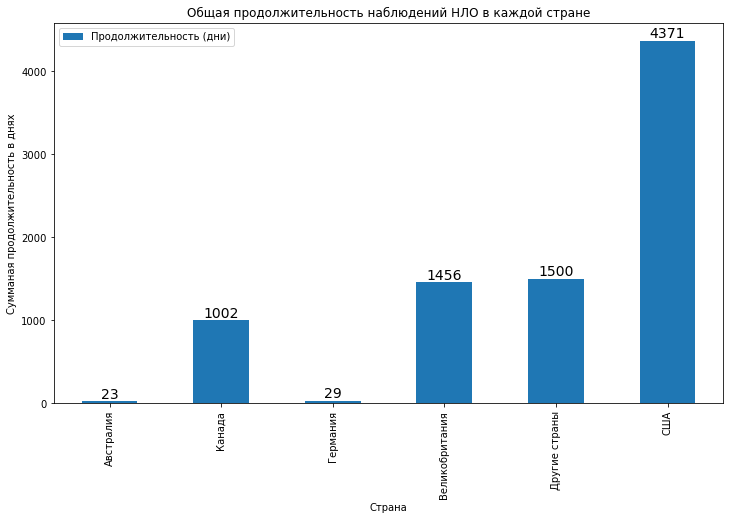

In [28]:
ufo_duration.plot(kind='bar', 
                  title='Общая продолжительность наблюдений НЛО в каждой стране',
                  xlabel='Страна',
                  ylabel='Сумманая продолжительность в днях')
for i, val in enumerate(ufo_duration.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})
plt.show()

In [29]:
# Посмотрим динамику по годам (посчитаем количество случаев наблюдения НЛО в каждом году)
ufo_by_year=ufo.copy() 
ufo_by_year['datetime']=ufo_by_year['datetime'].dt.year


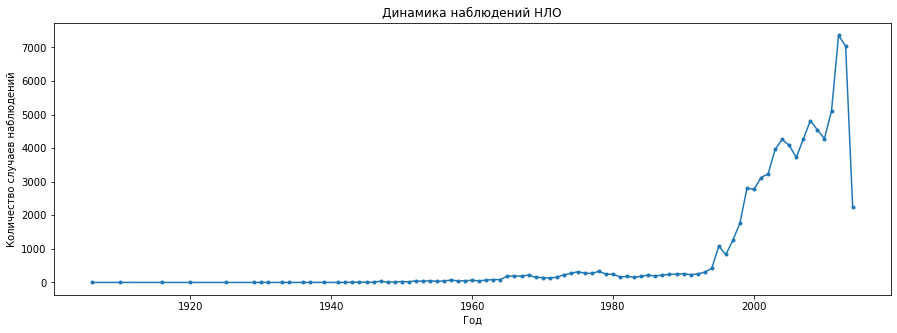

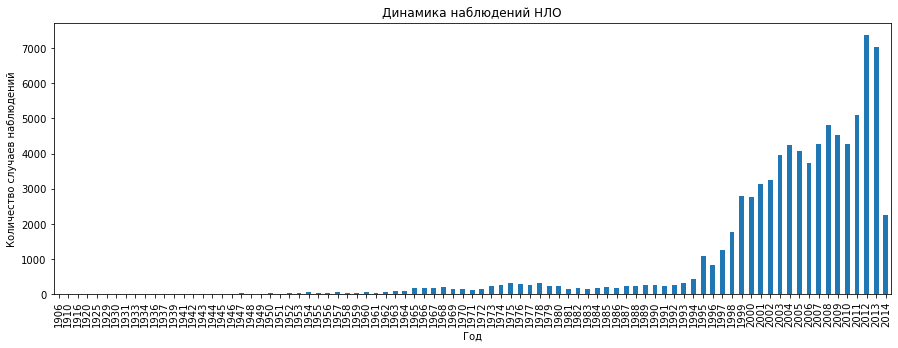

In [30]:
ufo_by_year.groupby('datetime')['duration (seconds)'].count().plot(style='.-',title='Динамика наблюдений НЛО',
                                                                    xlabel='Год', 
                                                                    ylabel='Количество случаев наблюдений', figsize=(15,5))
plt.show()
ufo_by_year.groupby('datetime')['duration (seconds)'].count().plot(kind='bar',title='Динамика наблюдений НЛО',
                                                                    xlabel='Год', 
                                                                    ylabel='Количество случаев наблюдений', figsize=(15,5))
plt.show()

In [31]:
# До 2012 года динамика наблюдений росла. В 2012 был самый пик, чуть меньше в 2013, а потом резкий спад.
# С чем это может быть связано? Возможно людей стало больше интересовать социально-политические события и они стали меньше
# смотреть в небо. А может быть в связи с развитием технолгий, когда у каждого есть смартфон с камерой, сообщения о
# наблюдении НЛО не подкрепленные видеодокозательствами не учитываются.

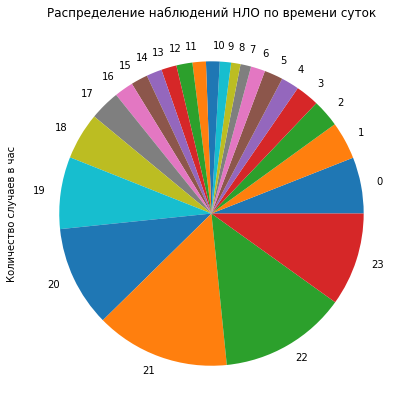

In [32]:
# В какое время суток чаще всего наблюдали НЛО?
ufo_by_time=ufo.copy() 
ufo_by_time['datetime']=ufo_by_time['datetime'].dt.hour
ufo_count_by_time=ufo_by_time.groupby('datetime')['duration (seconds)'].count()
ufo_count_by_time.plot(kind='pie', title='Распределение наблюдений НЛО по времени суток')
plt.ylabel('Количество случаев в час')
plt.show()

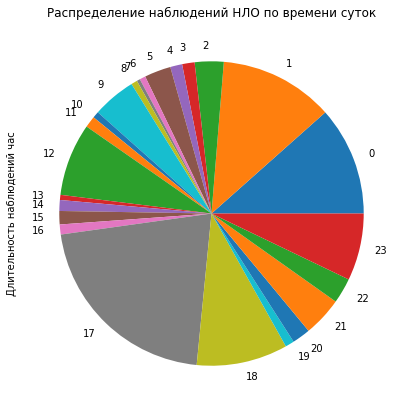

In [33]:
# А как от времени суток зависит средняя продолжительность наблюдений?
ufo_duration_by_time=ufo_by_time.groupby('datetime')['duration (seconds)'].mean()
ufo_duration_by_time.plot(kind='pie', title='Распределение наблюдений НЛО по времени суток')
plt.ylabel('Длительность наблюдений час')
plt.show()

In [34]:
# т.е. большинство случаем наблюдения НЛО были в вечернее и ночное время. А по длительности сложно выделить какую-то 
# зависимость, но в среднем самые длительные наблюдения так же вечером и ночью.  

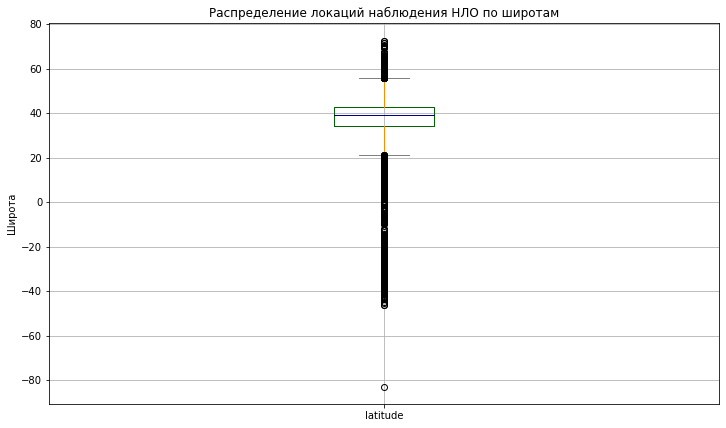

In [35]:
# В каких широтах чаще всего наблюдают НЛО? Отобразим в виде "ящика с усами" распределение известных случаев по широтам
color = {
        "boxes": "DarkGreen",
        "whiskers": "DarkOrange",
        "medians": "DarkBlue",
        "caps": "Gray",
        }
ufo_latitude=ufo['latitude']
ufo_latitude.plot.box(color=color,
                 title='Распределение локаций наблюдения НЛО по широтам', grid=True)
plt.ylabel('Широта')
plt.show()
# 

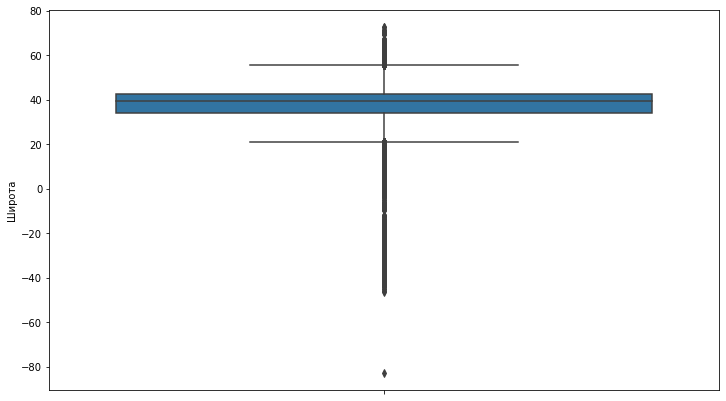

In [36]:
sns.boxplot(y="latitude", data=ufo)
plt.ylabel('Широта')
plt.show()

In [37]:
# Т.е. от 25% до 50% от общего числа случаев наблюдения НЛО были между 34 и 42 параллелями северной широты - в этих широтах
# как раз расположены Европа и США. 
# Все случаи, что наблюдались южнее 21 параллели и севернее 55 параллели  - вообще можно считать выбросами ))).

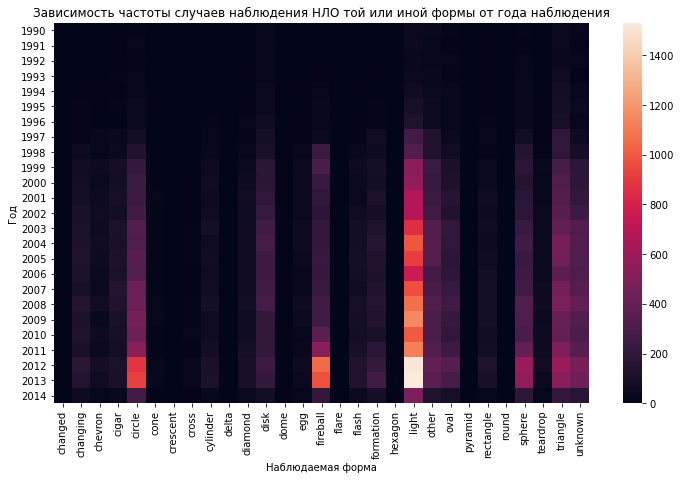

In [39]:
# Изучим в каком году какой формы НЛО наблюдали чаще?
ufo_heatmap= ufo.copy()
ufo_heatmap['datetime']=ufo_heatmap['datetime'].dt.year

# т.к. заметный рост случаев наблюдения НЛО начался лишь к концу 20-го столетия, то данные ранее 1990 г рассматривать не будем
ufo_heatmap = ufo_heatmap.loc[ufo_heatmap['datetime']>=1990].pivot_table(
                        index='datetime', 
                        columns='shape', 
                        values='duration (seconds)', 
                        aggfunc=len).fillna(0)
sns.heatmap(ufo_heatmap)
plt.title('Зависимость частоты случаев наблюдения НЛО той или иной формы от года наблюдения')
plt.ylabel('Год')
plt.xlabel('Наблюдаемая форма')
plt.show()

In [40]:
# Чаще всего наблюдали НЛО в форме light (видимо просто свечение) и пик пришелся на 2012-2013 года. Так же среди очевидцев были
# популярны формы circle (круг) и fireball (огненный шар) - так же пик пришелся на 2012-2013 года.

In [43]:
# Насчет визуализации sns.pairplot у меня фантазия уже иссякла, в выбранных мной данных не так много числовых данных, которые
# можно было бы использовать. Далее просто для галочки, что эта визуализация была использована. Что можно по ней оценить -
# не знаю.

ufo_pairplot = ufo.copy()
ufo_pairplot['datetime']=ufo_pairplot['datetime'].dt.year
ufo_pairplot=ufo_pairplot.groupby('datetime')['duration (seconds)','latitude','longitude'].mean()
ufo_pairplot

<ipython-input-43-84e7e226505d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ufo_pairplot=ufo_pairplot.groupby('datetime')['duration (seconds)','latitude','longitude'].mean()


,duration (seconds),latitude,longitude
datetime,,,
1906,10800.000000,48.208174,16.373819
1910,120.000000,36.451944,-94.295556
1916,60.000000,46.227638,2.213749
1920,60.000000,40.123889,-86.013333
1925,60.000000,41.420833,-90.015000
...,...,...,...
2010,21505.553280,38.513805,-87.499404
2011,2463.336332,38.248633,-89.629852
2012,9270.678520,38.646218,-87.746662


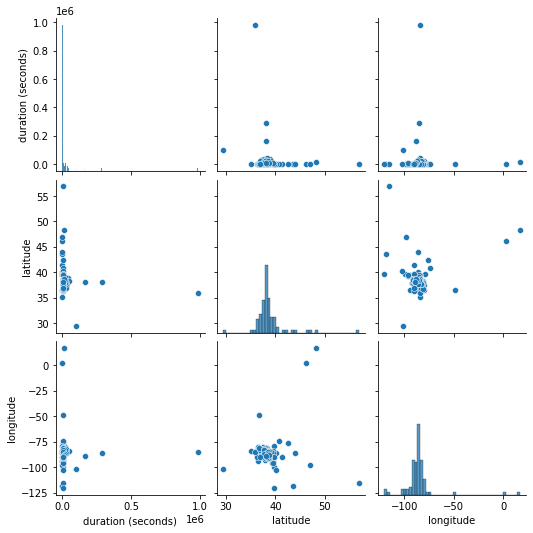

In [45]:
sns.pairplot(ufo_pairplot[['duration (seconds)','latitude','longitude']])

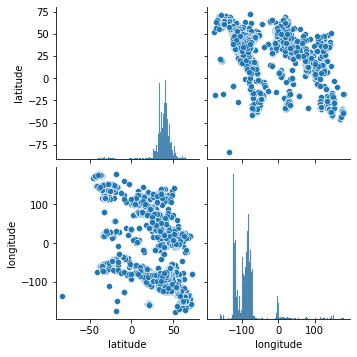

In [46]:
sns.pairplot(ufo[['latitude','longitude']])